In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import missingno
import numpy as np
import math

In [27]:
#loading raw data into dfs
raw_names = pd.read_csv("names.csv")
raw_patents = pd.read_csv("patents.csv")
raw_pacer = pd.read_csv("pacer_cases.csv")
raw_documents = pd.read_csv("documents.csv")
raw_cases = pd.read_csv("cases.csv")
raw_attorneys = pd.read_csv("attorneys.csv")


/var/folders/np/bq9h2df10zv053dxylt94lxw0000gn/T/ipykernel_9135/4076354320.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_names = pd.read_csv("names.csv")
/var/folders/np/bq9h2df10zv053dxylt94lxw0000gn/T/ipykernel_9135/4076354320.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_documents = pd.read_csv("documents.csv")


In [28]:
# Select relevant variables from raw_cases
cases = raw_cases[['case_row_id', 'case_number', 'district_id','demand','jury_demand' , 'case_cause', 'date_filed', 'date_closed']]

# Select relevant variables from raw_names
names = raw_names[['case_row_id', 'party_type', 'name_long']]

# Select relevant variables from raw_attorneys
attorneys = raw_attorneys[['case_row_id', 'attorney_name', 'attorney_contactinfo', 'position']]

# Select relevant variables from raw_documents
documents = raw_documents[['case_row_id', 'doc_number', 'short_description', 'doc_count', 
                           'long_description', 'doc_date_filed']]

# Select relevant variables from raw_patents
patents = raw_patents[['case_row_id', 'patent', 'patent_doc_type', 'case_type_1']]

# Select relevant variables from raw_pacer_cases
pacer = raw_pacer[['pacer_id', 'case_number', 'district_id', 'court_name', 
                               'case_name', 'date_filed', 'date_closed']]


In [29]:
merged_case = pd.merge(cases, names, on="case_row_id", how="inner")
merged_case.set_index(["case_number", "party_type"], inplace=True)

In [30]:
merged_case

case_row_id district_id demand jury_demand  \
case_number   party_type                                                     
2:10-cv-00601 Defendant             75332.0        almd    NaN         NaN   
              Defendant             75332.0        almd    NaN         NaN   
              Plaintiff             75332.0        almd    NaN         NaN   
1:98-cv-00596 Counter Claimant       6908.0        alnd    NaN         NaN   
              Counter Defendant      6908.0        alnd    NaN         NaN   
...                                     ...         ...    ...         ...   
1:06-cv-00164 Counter Defendant     13232.0         wyd    NaN        Both   
              Counter Defendant     13232.0         wyd    NaN        Both   
              Defendant             13232.0         wyd    NaN        Both   
              Defendant             13232.0         wyd    NaN        Both   
              Plaintiff             13232.0         wyd    NaN        Both   

                                                  case_cause  date_filed  \
case_number   party_type                                                   
2:10-cv-00601 Defendant          15:1126 Patent Infringement  2010-07-14   
              Defendant          15:1126 Patent Infringement  2010-07-14   
              Plaintiff          15:1126 Patent Infringement  2010-07-14   
1:98-cv-00596 Counter Claimant    35:183 Patent Infringement  1998-03-16   
              Counter Defendant   35:183 Patent Infringement  1998-03-16   
...                                                      ...         ...   
1:06-cv-00164 Counter Defendant   35:271 Patent Infringement  2006-06-27   
              Counter Defendant   35:271 Patent Infringement  2006-06-27   
              Defendant           35:271 Patent Infringement  2006-06-27   
              Defendant           35:271 Patent Infringement  2006-06-27   
              Plaintiff           35:271 Patent Infringement  2006-06-27   

                                date_closed  \
case_number   party_type                      
2:10-cv-00601 Defendant          2010-10-12   
              Defendant          2010-10-12   
              Plaintiff          2010-10-12   
1:98-cv-00596 Counter Claimant   1998-09-21   
              Counter Defendant  1998-09-21   
...                                     ...   
1:06-cv-00164 Counter Defendant  2007-05-14   
              Counter Defendant  2007-05-14   
              Defendant          2007-05-14   
              Defendant          2007-05-14   
              Plaintiff          2007-05-14   

                                                                   name_long  
case_number   party_type                                                      
2:10-cv-00601 Defendant                               Johnson & Johnson Inc.  
              Defendant                                     McNeil-PPC. Inc.  
              Plaintiff                                   William E. Bowhall  
1:98-cv-00596 Counter Claimant           Touchnet Information Systems, Inc.,  
              Counter Defendant                             Richard P Mettke  
...                                                                      ...  
1:06-cv-00164 Counter Defendant                Mountain West Motorsports Inc  
              Counter Defendant                Mountain West Motorsports Inc  
              Defendant                      Benz Silent Rider a corporation  
              Defendant                       Willard B Turner an individual  
              Plaintiff          Mountain West Motorsports Inc a corporation  

[560931 rows x 8 columns]

In [31]:
cases_over_time = pd.DataFrame()
cases_over_time["case_number"] = cases["case_number"]



cases_over_time["year_filed"] = cases['date_filed'].str[:4].dropna().astype(int)
#cases_over_time["month_filed"] = cases['date_filed'].str[5:7].dropna().astype(int)
#cases_over_time["day_filed"] = cases['date_filed'].str[9:].dropna().astype(int)

cases_over_time["year_closed"] = cases['date_closed'].str[:4].dropna().astype(int)
#cases_over_time["month_closed"] = cases['date_closed'].str[5:7].dropna().astype(int)
#cases_over_time["day_closed"] = cases['date_closed'].str[9:].dropna().astype(int)

cases_over_time

,case_number,year_filed,year_closed
0,4:92-cv-00055,1992,1993.0
1,2:10-cv-00601,2010,2010.0
2,1:98-cv-00596,1998,1998.0
3,1:98-cv-00654,1998,1999.0
4,1:18-cv-00012,2018,2018.0
...,...,...,...
96961,2:97-cv-00019,1997,1997.0
96962,2:11-cv-00352,2011,2012.0
96963,2:15-cv-00149,2015,2015.0
96964,2:08-cv-00045,2008,2009.0


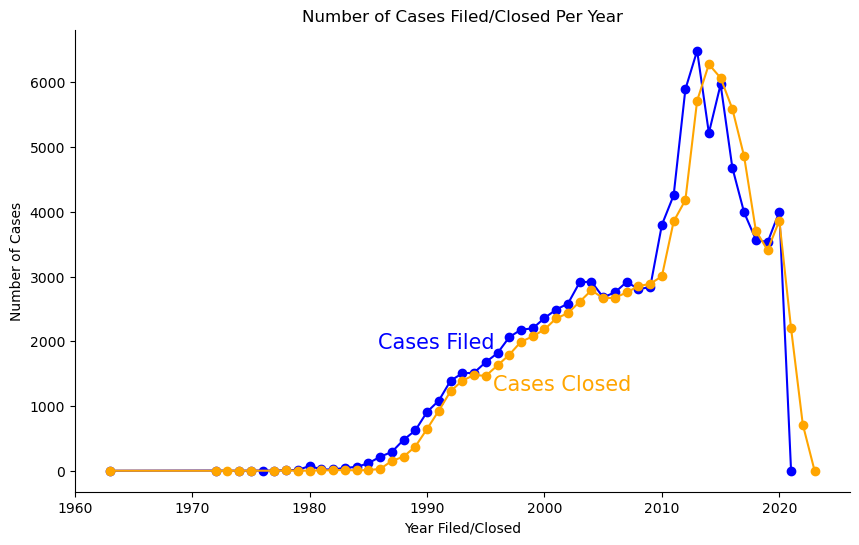

In [32]:
# Aggregate the number of cases filed per year
annual_filings = cases_over_time['year_filed'].value_counts().sort_index()

annual_closings = cases_over_time['year_closed'].value_counts().sort_index()
annual_closings = annual_closings[annual_closings.index >= 1949]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(annual_filings.index, annual_filings.values, marker='o', linestyle='-', color='blue')
plt.annotate('Cases Filed', (1995, 2000), textcoords="offset points", xytext=(-36,-5), ha='center', color="blue", fontsize=15)  # Label for Year Filed
plt.plot(annual_closings.index, annual_closings.values, marker='o', linestyle='-', color='orange')
plt.annotate('Cases Closed', (1995, 700), textcoords="offset points", xytext=(55, 25), ha='center', color='orange', fontsize=15)  # Label for Year Closed
plt.title('Number of Cases Filed/Closed Per Year')
plt.xlabel('Year Filed/Closed')
plt.ylabel('Number of Cases')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

In [33]:
cases_over_time["years_active"] = cases_over_time["year_closed"] - cases_over_time["year_filed"]

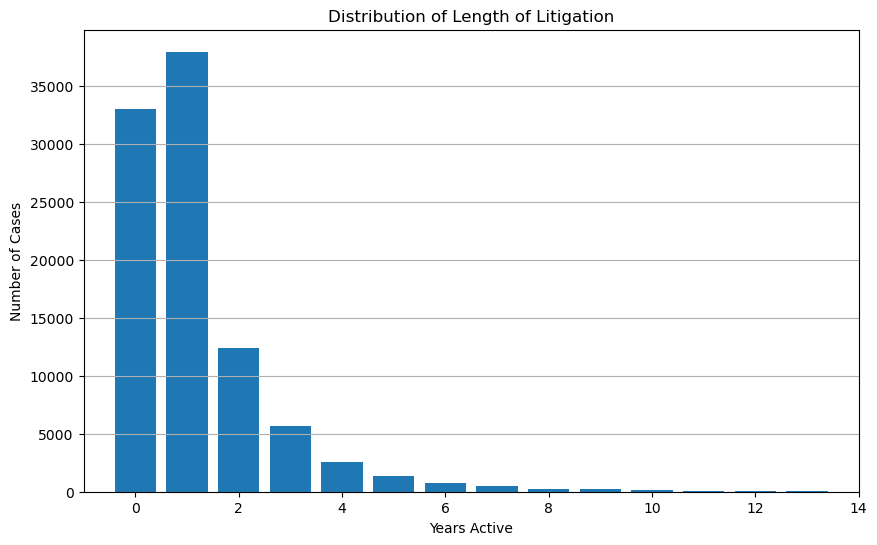

In [34]:
# Group by years_active and count the number of cases for each value
years_active_counts = cases_over_time['years_active'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(years_active_counts.index, years_active_counts.values)
plt.title('Distribution of Length of Litigation')
plt.xlabel('Years Active')
plt.ylabel('Number of Cases')
plt.grid(axis='y')
plt.xlim(-1, 14)
plt.show()

In [35]:
documents

,case_row_id,doc_number,short_description,doc_count,long_description,doc_date_filed
0,1.0,37.0,NaN,1,"COPY OF PAPER DOCKET SHEET (kw, Deputy Clerk) ...",2000-08-03
1,1.0,NaN,NaN,2,CASE CLOSED. Case and Motions no longer referr...,1982-05-31
2,3.0,123.0,NaN,1,COPY OF PAPER DOCKET SHEET (Former Deputy Cler...,2004-02-13
3,3.0,NaN,NaN,2,Case closed (Former Deputy Clerk) (Entered: 03...,1992-03-01
4,3.0,NaN,NaN,3,Case reopened (Former Deputy Clerk) (Entered: ...,1990-10-16
...,...,...,...,...,...,...
9882317,NaN,331.0,NaN,918,NaN,NaN
9882318,NaN,331.0,NaN,919,NaN,NaN
9882319,NaN,331.0,NaN,920,NaN,NaN
9882320,NaN,332.0,NaN,921,Satisfaction of Judgment re 324 Judgment enter...,2012-01-09


In [36]:
docs_per_case = pd.DataFrame()
docs_per_case['case_row_id'] = documents['case_row_id']
docs_per_case['doc_count'] = documents['doc_count']
docs_per_case['doc_count']

0            1
1            2
2            1
3            2
4            3
          ... 
9882317    918
9882318    919
9882319    920
9882320    921
9882321    922
Name: doc_count, Length: 9882322, dtype: int64

In [37]:
docs_dist = pd.DataFrame(docs_per_case.groupby("case_row_id").count())
docs_dist

,doc_count
case_row_id,
1.0,2
3.0,7
4.0,3
5.0,5
6.0,3
...,...
104652.0,48
104653.0,61
104654.0,5


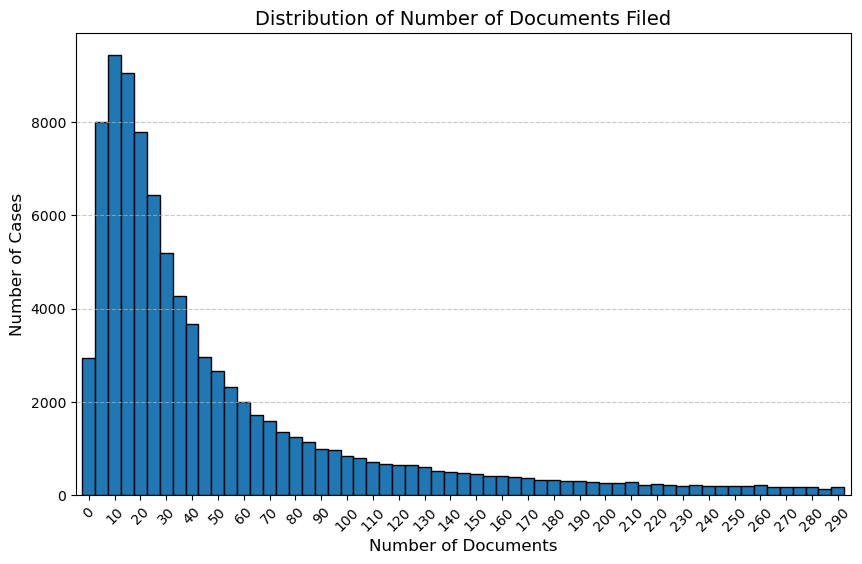

In [38]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(docs_dist, bins=range(0, 300, 5), edgecolor='black', align='left')

# Adding labels and title
plt.title('Distribution of Number of Documents Filed', fontsize=14)
plt.xlabel('Number of Documents', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(0, 300, 10), rotation=45)
plt.xlim(-5, 295)

# Display the plot
plt.show()

In [39]:
patents

,case_row_id,patent,patent_doc_type,case_type_1
0,725.0,5696571,Patent,NaN
1,726.0,6384088,Patent,2.0
2,727.0,6457274,Patent,1.0
3,728.0,5108321,Patent,1.0
4,729.0,6153278,Patent,1.0
...,...,...,...,...
159396,91151.0,8337513,Patent,1.0
159397,91151.0,9550052,Patent,1.0
159398,91151.0,7678120,Patent,1.0
159399,91151.0,6641591,Patent,1.0


In [40]:
case_type1_dist = pd.DataFrame(patents['case_type_1'].value_counts())
case_type1_dist = case_type1_dist.reset_index()
case_type1_dist

,case_type_1,count
0,1.0,138385
1,2.0,9807
2,5.0,3159
3,3.0,2976
4,6.0,1207
5,4.0,952
6,10.0,865
7,9.0,532
8,11.0,444
9,15.0,381


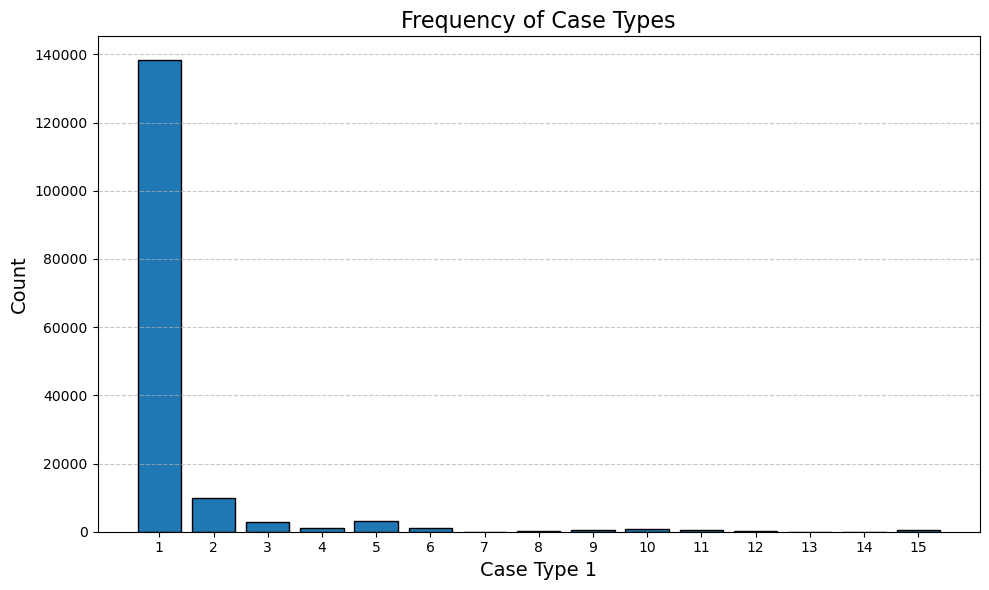

In [41]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(case_type1_dist['case_type_1'], case_type1_dist['count'], width=0.8, edgecolor='black')

# Adding labels and title
plt.xlabel('Case Type 1', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Frequency of Case Types', fontsize=16)
plt.xticks(case_type1_dist['case_type_1'])  # Ensuring all case types are labeled
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.xlim(2,15)
#plt.ylim(0,10000)

# Show the histogram
plt.tight_layout()
plt.show()

In [42]:
case_type2_dist = pd.DataFrame(raw_patents['case_type_2'].value_counts())
case_type2_dist = case_type2_dist.reset_index()

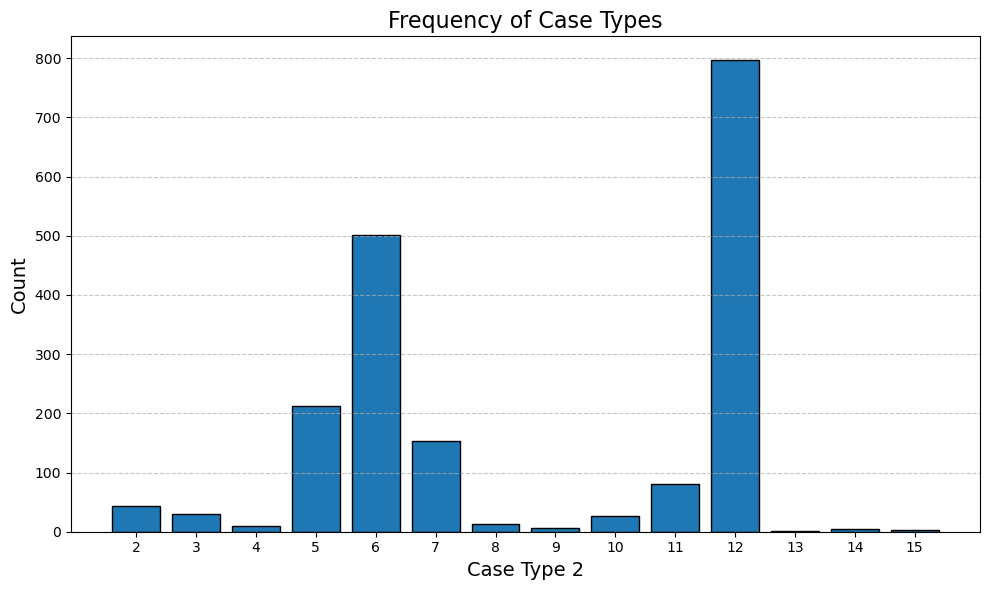

In [43]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(case_type2_dist['case_type_2'], case_type2_dist['count'], width=0.8, edgecolor='black')

# Adding labels and title
plt.xlabel('Case Type 2', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Frequency of Case Types', fontsize=16)
plt.xticks(case_type2_dist['case_type_2'])  # Ensuring all case types are labeled
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.xlim(2,15)
#plt.ylim(0,10000)

# Show the histogram
plt.tight_layout()
plt.show()

In [45]:
raw_names['name_long'].groupby([raw_names["name_long"].str.contains(" inc", case=False, na=False)]).count()

name_long
False    349155
True     277293
Name: name_long, dtype: int64

In [47]:
raw_names['name_long'].groupby([raw_names["name_long"].str.contains(" llc", case=False, na=False)]).count()

name_long
False    538055
True      88393
Name: name_long, dtype: int64

In [67]:
raw_names['name_long'].groupby([raw_names["name_long"].str.contains(" corp", case=False, na=False)]).count()

name_long
False    525156
True     101292
Name: name_long, dtype: int64

In [69]:
raw_names['name_long'].groupby([raw_names["name_long"].str.contains(" ltd", case=False, na=False)]).count()

name_long
False    597961
True      28487
Name: name_long, dtype: int64

In [71]:
(277293 + 88393 + 101292 + 28487) / len(raw_names)

0.7908876285582481

In [73]:
#identifying firms
firms = pd.DataFrame(raw_names[['case_row_id', 'case_number', 'party_type', 'name_long']])

In [75]:
firms

,case_row_id,case_number,party_type,name_long
0,1,0:79-cv-06704,Defendant,Generix Drug Corp.
1,3,0:83-cv-06860,Defendant,"U. S. COnstruction Manufacturing, Inc."
2,4,0:84-cv-06456,Defendant,On-Rite Hairpiece Company
3,5,0:84-cv-06726,Defendant,R.L. Tuttle Jr.
4,6,0:85-cv-06225,Defendant,True Fit Chair Of Florida
...,...,...,...,...
626462,104656,3:05-cv-00035,Defendant,Eric Gannon
626463,104656,3:05-cv-00035,Defendant,Steven Merchant
626464,104656,3:05-cv-00035,Defendant,Cary Butler
626465,104656,3:05-cv-00035,Defendant,Karen Coulter


In [77]:
firms['cleaned_names'] = firms['name_long'].fillna("").astype(str).str.strip()
firms['cleaned_names'] = firms['cleaned_names'].str.lower()
firms['cleaned_names'] = firms['cleaned_names'].str.split(" ")

In [91]:
classified_firms = pd.DataFrame(firms[["case_number", "case_row_id", "party_type", "name_long", "cleaned_names"]])

classified_firms["INC"] = classified_firms.apply(
    lambda row: 1 if any(keyword in row['cleaned_names'] for keyword in ['inc.', 'inc']) else 0, axis=1
)
classified_firms["LLC"] = classified_firms.apply(
    lambda row: 1 if any(keyword in row['cleaned_names'] for keyword in ['llc.', 'llc']) else 0, axis=1
)
classified_firms["CORP"] = classified_firms.apply(
    lambda row: 1 if any(keyword in row['cleaned_names'] for keyword in ['corp.', 'corp']) else 0, axis=1
)
classified_firms["LTD"] = classified_firms.apply(
    lambda row: 1 if any(keyword in row['cleaned_names'] for keyword in ['ltd.', 'ltd']) else 0, axis=1
)

classified_firms['name_long'] = classified_firms['name_long'].str.lower().

In [80]:
classified_firms.head()

,case_number,case_row_id,party_type,name_long,cleaned_names,INC,LLC,CORP,LTD
0,0:79-cv-06704,1,Defendant,generix drug corp.,"[generix, drug, corp.]",0,0,1,0
1,0:83-cv-06860,3,Defendant,"u. s. construction manufacturing, inc.","[u., s., construction, manufacturing,, inc.]",1,0,0,0
2,0:84-cv-06456,4,Defendant,on-rite hairpiece company,"[on-rite, hairpiece, company]",0,0,0,0
3,0:84-cv-06726,5,Defendant,r.l. tuttle jr.,"[r.l., tuttle, jr.]",0,0,0,0
4,0:85-cv-06225,6,Defendant,true fit chair of florida,"[true, fit, chair, of, florida]",0,0,0,0


In [83]:
import spacy
import re
nlp = spacy.load("en_core_web_lg")  # English langue nlp model for making sense of company names/assigning industries

In [107]:
classified_firms["cleaned_names"] = classified_firms["name_long"].str.replace(".", "").replace(",", "").replace("-", "")
classified_firms.head()

,case_number,case_row_id,party_type,name_long,cleaned_names,INC,LLC,CORP,LTD
0,0:79-cv-06704,1,Defendant,generix drug corp.,generix drug corp,0,0,1,0
1,0:83-cv-06860,3,Defendant,"u. s. construction manufacturing, inc.","u s construction manufacturing, inc",1,0,0,0
2,0:84-cv-06456,4,Defendant,on-rite hairpiece company,on-rite hairpiece company,0,0,0,0
3,0:84-cv-06726,5,Defendant,r.l. tuttle jr.,rl tuttle jr,0,0,0,0
4,0:85-cv-06225,6,Defendant,true fit chair of florida,true fit chair of florida,0,0,0,0


In [117]:
#converting to list, for computational efficiency
texts = classified_firms["cleaned_names"].dropna().tolist()

# Process using spaCy's pipe (MUCH faster)
docs = list(nlp.pipe(texts, batch_size=500))  # Adjust batch size based on RAM

# Extract results
entity_types = []
for doc in docs:
    label = "Unknown"
    for ent in doc.ents:
        if ent.label_ == "ORG":
            label = "Company"
        elif ent.label_ == "PERSON":
            label = "Individual"
    entity_types.append(label)


In [123]:
# Assign results back (only for non-NaN rows)
classified_firms.loc[lawsuit_firms["cleaned_names"].notna(), "entity_type"] = entity_types
classified_firms.head(15)

,case_number,case_row_id,party_type,name_long,cleaned_names,INC,LLC,CORP,LTD,entity_type
0,0:79-cv-06704,1,Defendant,generix drug corp.,generix drug corp,0,0,1,0,Company
1,0:83-cv-06860,3,Defendant,"u. s. construction manufacturing, inc.","u s construction manufacturing, inc",1,0,0,0,Company
2,0:84-cv-06456,4,Defendant,on-rite hairpiece company,on-rite hairpiece company,0,0,0,0,Unknown
3,0:84-cv-06726,5,Defendant,r.l. tuttle jr.,rl tuttle jr,0,0,0,0,Individual
4,0:85-cv-06225,6,Defendant,true fit chair of florida,true fit chair of florida,0,0,0,0,Unknown
5,0:85-cv-06368,7,Defendant,"cry chem international, inc","cry chem international, inc",1,0,0,0,Company
6,0:85-cv-06452,8,Defendant,"wang laboratories inc.,","wang laboratories inc,",0,0,0,0,Company
7,0:85-cv-06607,9,Defendant,"shelfco, inc.","shelfco, inc",1,0,0,0,Company
8,0:86-cv-06181,10,Defendant,"homer products intl., inc.","homer products intl, inc",1,0,0,0,Company
9,0:86-cv-06459,11,Defendant,"automated customs systems, inc.","automated customs systems, inc",1,0,0,0,Unknown


In [121]:
classified_firms.groupby(classified_firms['entity_type'] == 'Company').count()

,case_number,case_row_id,party_type,name_long,cleaned_names,INC,LLC,CORP,LTD,entity_type
entity_type,,,,,,,,,,
False,164951,164952,164946,164933,164933,164952,164952,164952,164952,164952
True,461515,461515,461513,461515,461515,461515,461515,461515,461515,461515


In [125]:
classified_firms.to_csv("parties_classified.csv", index=False)
